<ipython-input-30-847f20f27c1e>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.quarter]).mean()


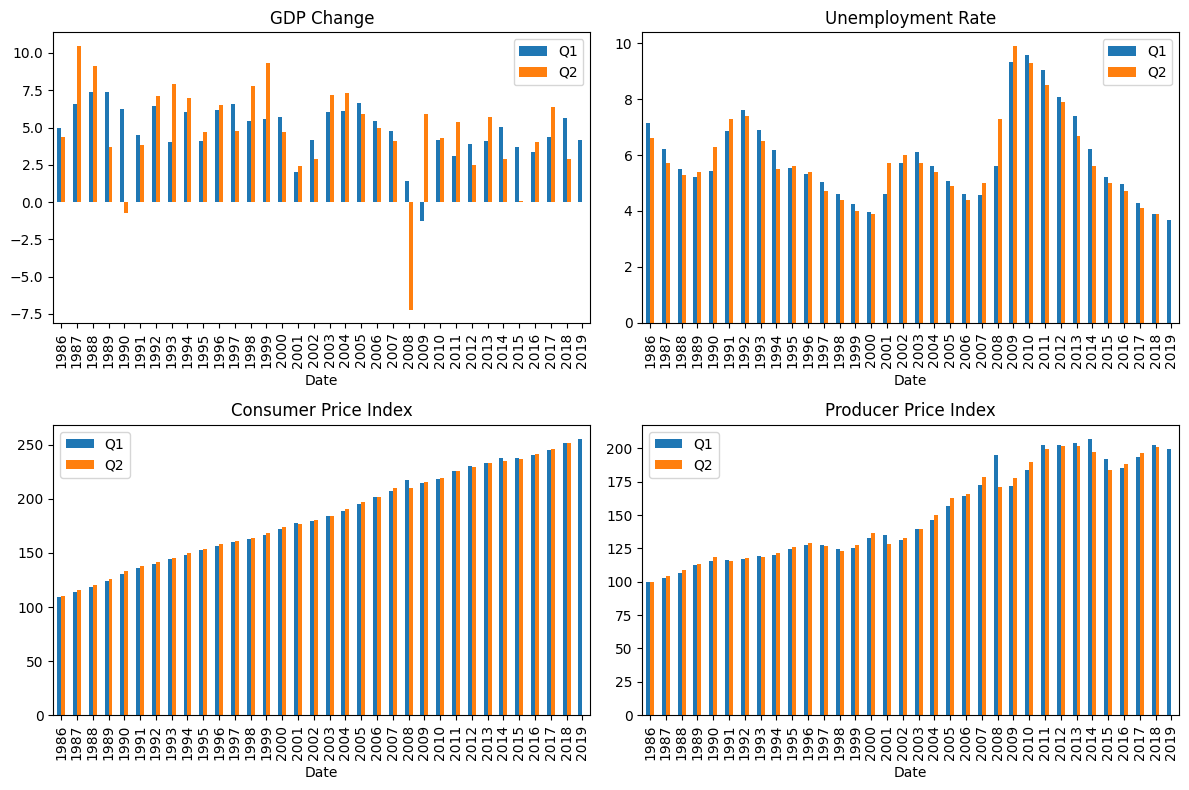


Combined Quarterly Data:
Date  Date     level_1           1      2
0     1986         cpi  109.500000  110.5
1     1986  gdp_change    4.966667    4.4
2     1986         ppi   99.866667   99.7
3     1986      unrate    7.133333    6.6
4     1987         cpi  113.533333  115.4
..     ...         ...         ...    ...
131   2018      unrate    3.900000    3.9
132   2019         cpi  255.701333    NaN
133   2019  gdp_change    4.133333    NaN
134   2019         ppi  199.833333    NaN
135   2019      unrate    3.666667    NaN

[136 rows x 4 columns]


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/ngupta23/gdp_prediction/master/data/archived/economic_indicators_all.csv'
df = pd.read_csv(url)

# Convert the date to a datetime format
df[['Year', 'Quarter']] = df['date'].str.split(' ', expand=True)
df['Date'] = df['Year'] + '-' + df['Quarter'].str.replace('Q', '')
df['Date'] = pd.to_datetime(df['Date'])

# Select the desired columns for analysis
selected_columns = ['Date', 'gdp_change', 'unrate', 'cpi', 'ppi']
df = df[selected_columns]

# Filter data for the years 1986-2020
df = df[(df['Date'].dt.year >= 1986) & (df['Date'].dt.year <= 2020)]

# Group by quarter and calculate the mean
quarterly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.quarter]).mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (column, title) in enumerate(zip(selected_columns[1:], ['GDP Change', 'Unemployment Rate', 'Consumer Price Index', 'Producer Price Index'])):
    ax = axes[i // 2, i % 2]
    quarterly_data[column].unstack().plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.legend(['Q1', 'Q2', 'Q3', 'Q4'])

plt.tight_layout()
plt.show()

# Combine quarterly data into one dataframe
quarterly_combined = quarterly_data.unstack().stack(level=0).reset_index()

print("\nCombined Quarterly Data:")
print(quarterly_combined)
